In [1]:
import graph_tool.all as gt
import networkx as nx
import matplotlib.pyplot as plt
import math
import random

In [16]:
import random

In [2]:
%matplotlib inline

In [49]:
def qt_draw(g,axis_pos):
    pos = nx.spring_layout(g)
    nx.draw_networkx(G=g, pos=pos,node_size=20, ax=axis_pos, with_labels=False,connectionstyle="arc3,rad=0.2",node_color="#750101",edgecolors="#000000")


In [50]:
def qt_draw2(g,axis_pos):
    pos = nx.shell_layout(g)
    nx.draw_networkx(G=g, pos=pos,node_size=20, ax=axis_pos, with_labels=False,connectionstyle="arc3,rad=0.1",node_color="#750101",edgecolors="#000000")


In [3]:
plt.rcParams.update({'font.size': 6})
plt.rcParams['figure.dpi'] = 450

In [17]:
random.seed(2022)

In [9]:
nodelist = [1,2,3]
edgelist = [(1,2),(1,3),(2,1),(2,3),(3,1),(3,2)]

In [10]:
graph = nx.DiGraph(edgelist)

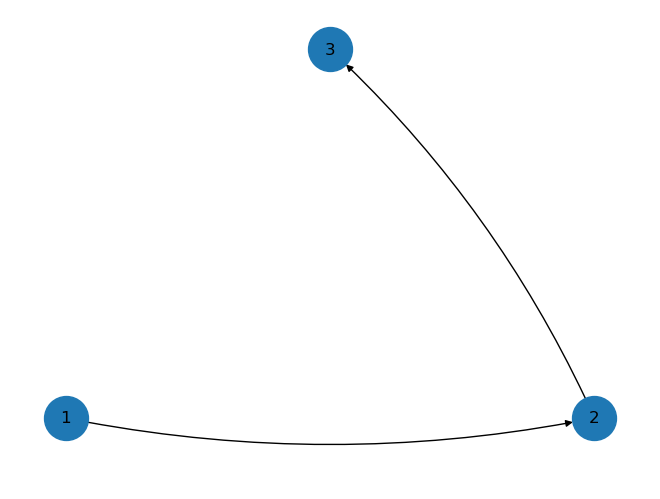

In [48]:
graph2 = nx.DiGraph([(1,2),(2,3)])
nx.draw_planar(graph2,connectionstyle="arc3,rad=0.1",with_labels=True,node_size=1000)

In [ ]:
gt.isomorphism()
nx.is_isomorphic()

In [5]:
graph = gt.load_graph(file_name="data/pydep.graphml")
graph2 = graph
gt.remove_self_loops(graph2)

In [11]:
G = nx.read_adjlist(path="data/requirements.csv",delimiter=",",nodetype=str,create_using=nx.DiGraph)


In [12]:
len(G.edges())

221762

In [10]:
import pandas as pd

In [17]:
with open("data/requirements.csv") as fille:
    df = pd.read_csv(fille,delimiter=",")

df = df.drop(columns=["package","package_version"])
df.head()
df = df.dropna(axis=0)
df.head()

,requirement,package_name
2,beautifulsoup4,115wangpan
3,homura,115wangpan
4,humanize,115wangpan
5,pycurl,115wangpan
6,pysocks,115wangpan


In [34]:
a = df.reset_index(drop="index")
a.head()
a.values[0]

array(['beautifulsoup4', '115wangpan'], dtype=object)

In [52]:
elist = list()
for row in df.values:
    tupl = (row[1],row[0]) if row[1] != row[0] else None
    elist.append(tupl) if tupl is not None else None
print(len(elist))

72991


In [37]:
ggr = nx.DiGraph(elist)

In [39]:
nx.write_graphml(ggr,path="data/pydep2.graphml")

In [41]:
ab = gt.load_graph("data/pydep2.graphml")

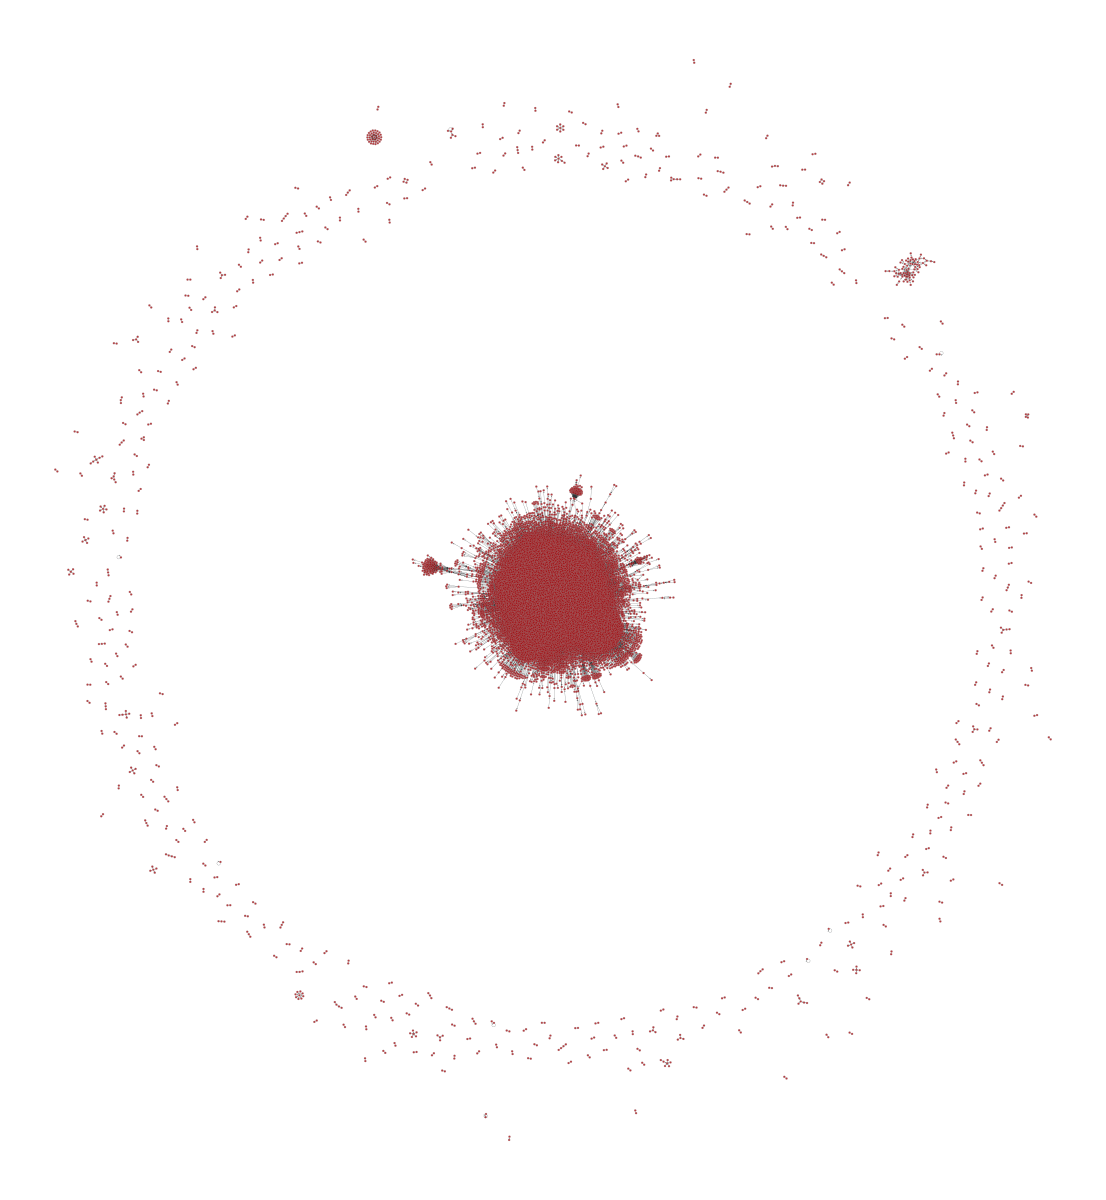

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x288a9da10, at 0x1676d4390>

In [42]:
gt.graph_draw(ab)

In [44]:
gt.openmp_set_schedule("auto")

In [53]:
bc = ab
gt.remove_self_loops(bc)
bc.num_edges()

72177

In [46]:
graph = ab
subg_size = 3

motiflist = gt.motifs(graph,subg_size)

In [54]:
graph = bc
subg_size = 3

motiflist = gt.motifs(graph,subg_size)

In [55]:

motifs_nx = list()
for subg in motiflist[0]:
    el = list() 
    el += subg.iter_edges()
    motifs_nx += [nx.from_edgelist(el,create_using=nx.DiGraph())]
sig_list = gt.motif_significance(graph,subg_size,shuffle_model="erdos")

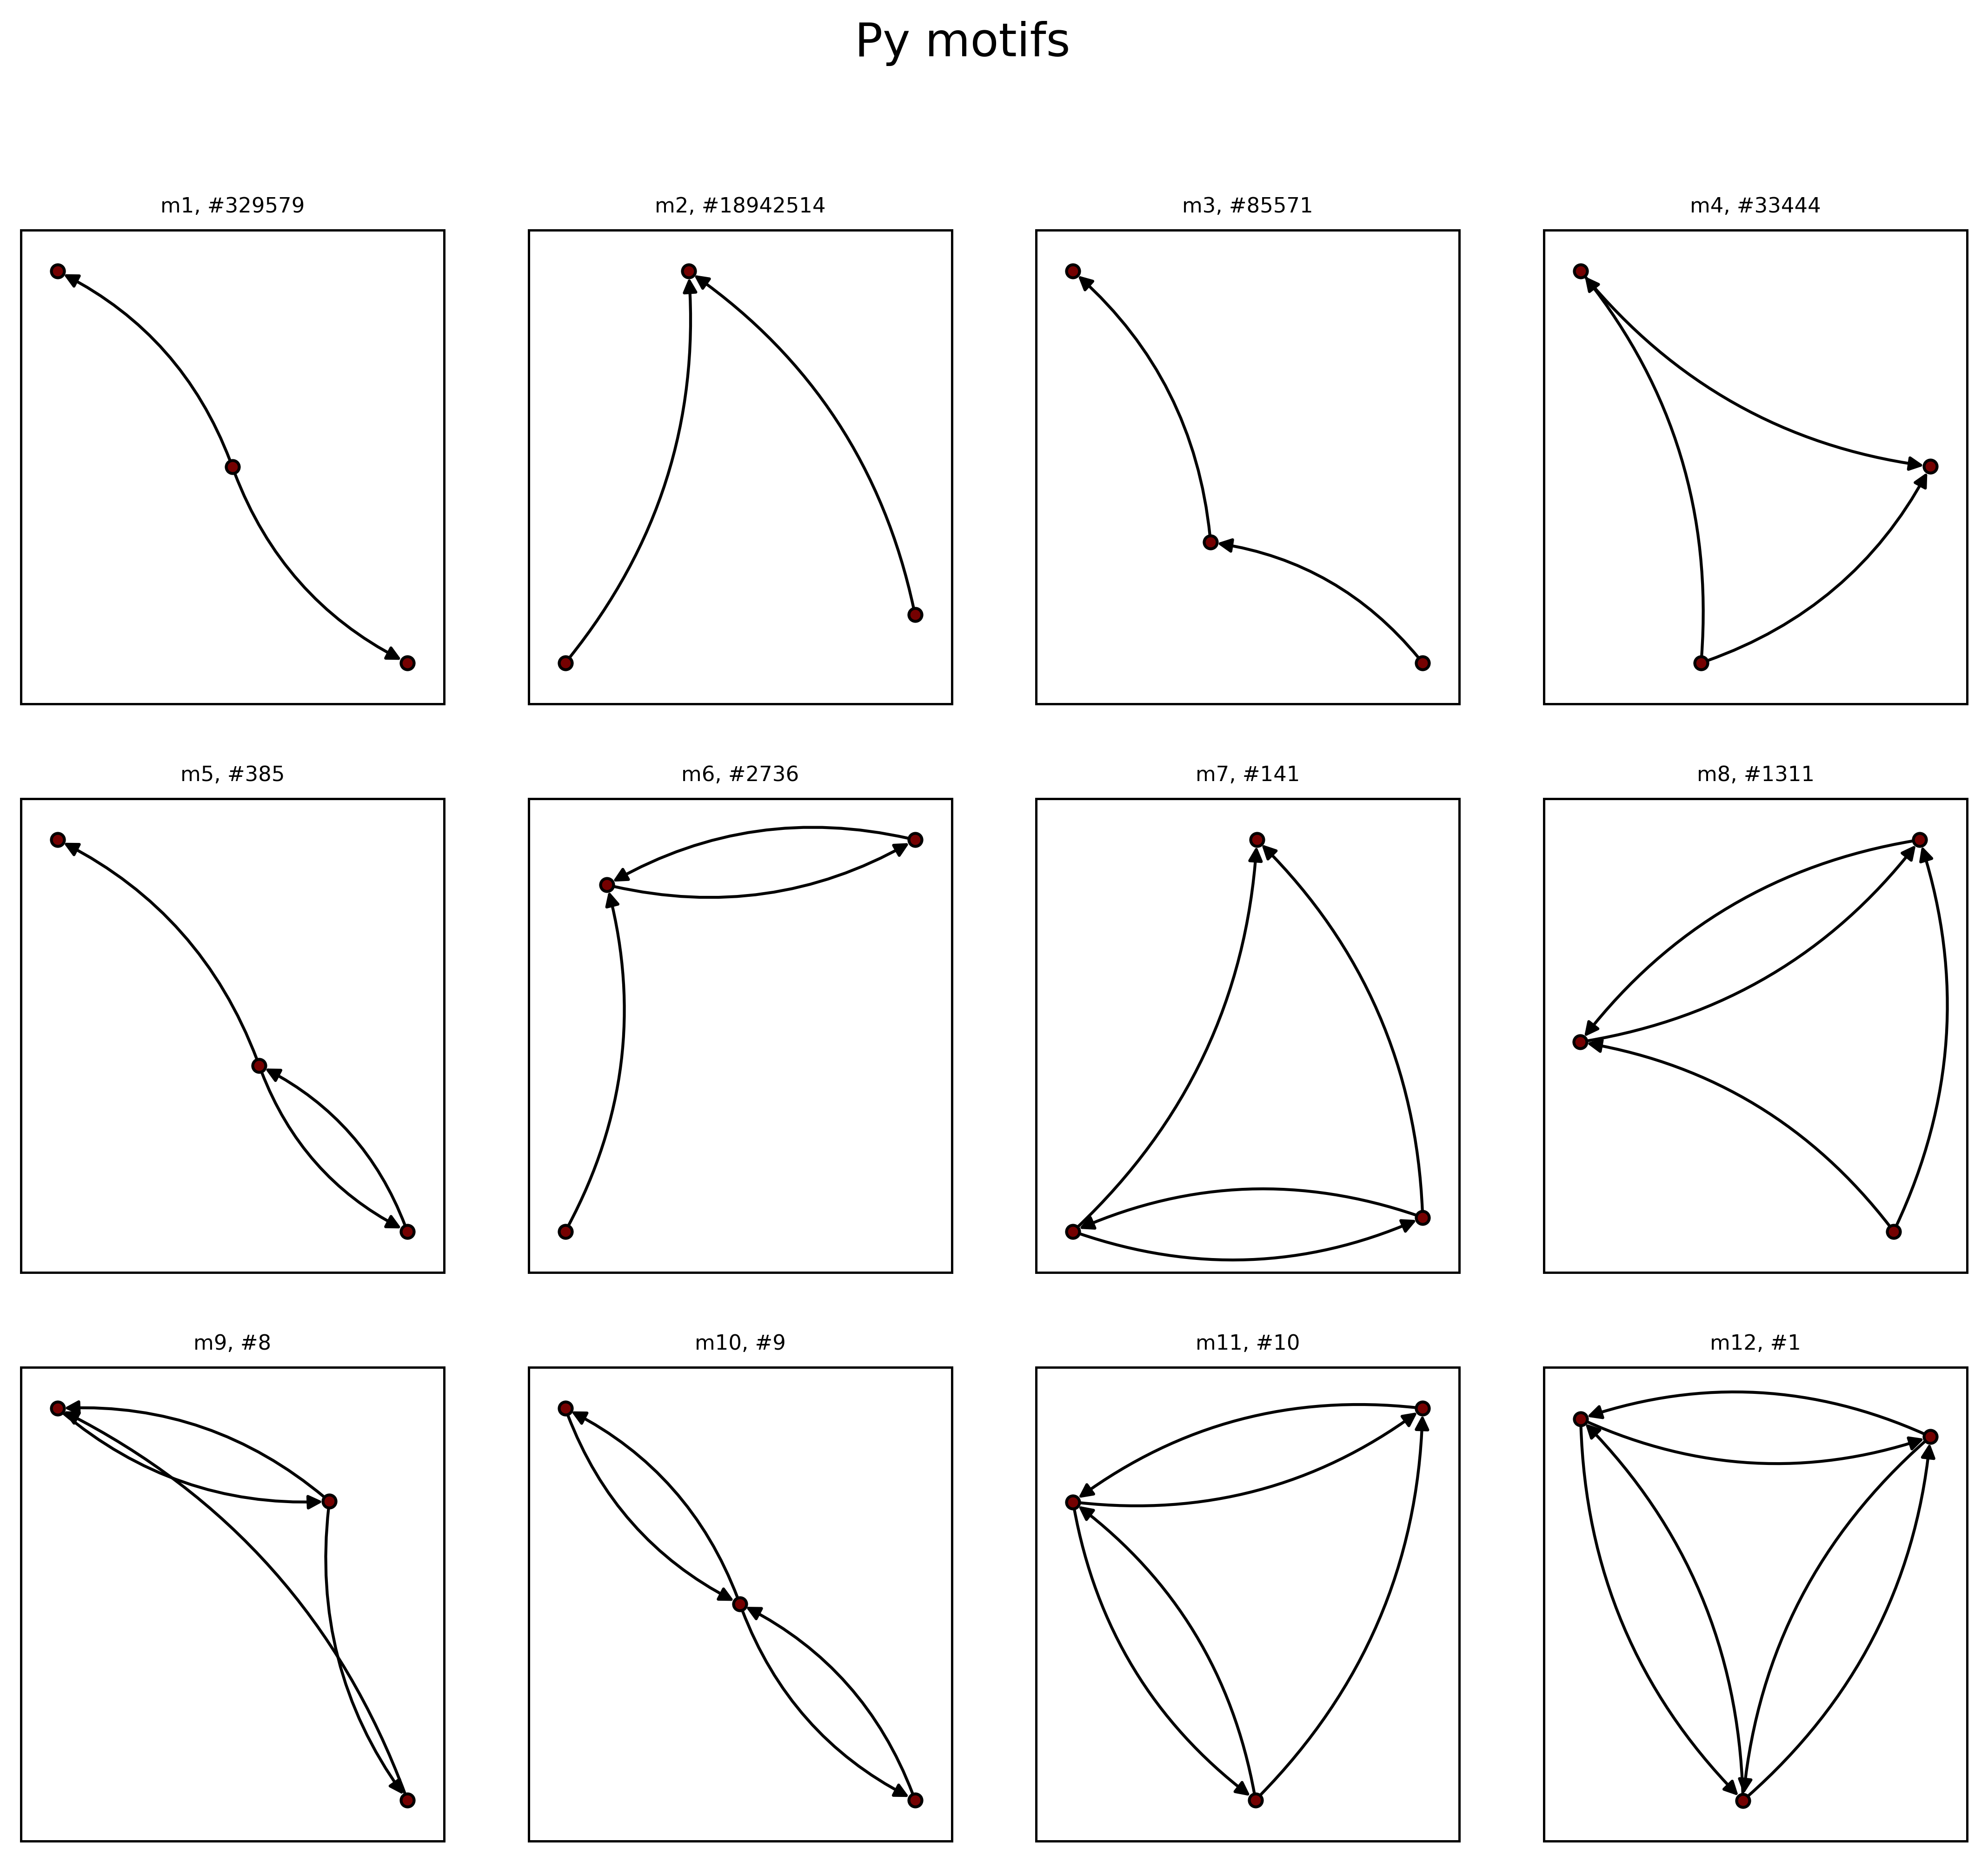

In [57]:
n_motifs    = len(motiflist[0])
base        = math.ceil(math.sqrt(n_motifs))
height      = math.ceil(n_motifs/base)
fig, ax     = plt.subplots(height, base, figsize=(12, 10))
fig.suptitle("Py motifs",fontsize=16)
for i,motif in enumerate(motifs_nx,1):
    try:
        y = ((i-1) % base)
        x = math.floor((i-1)/base)
        ax[x,y].set_title(f"m{i}, #{motiflist[1][i-1]}")
        # gt.graph_draw(motif,mplfig=ax[x,y],nodesfirst=True)
        # nx.draw_networkx(motif,ax=ax[x,y],with_labels=False)
        qt_draw(g=motif,axis_pos=ax[x,y])
    except IndexError:
        print(i,x,y)
# len(sig_list[0])
# n = list()
# for i in range(1,n_motifs+1):
#     n += [f"m{i}"]
# ax[2,3].bar(n,sig_list[1],color="darkred",edgecolor="black",linewidth=1)
# ax[2,3].set_title("Z-scores")

Text(0.5, 1.0, 'Z-scores')

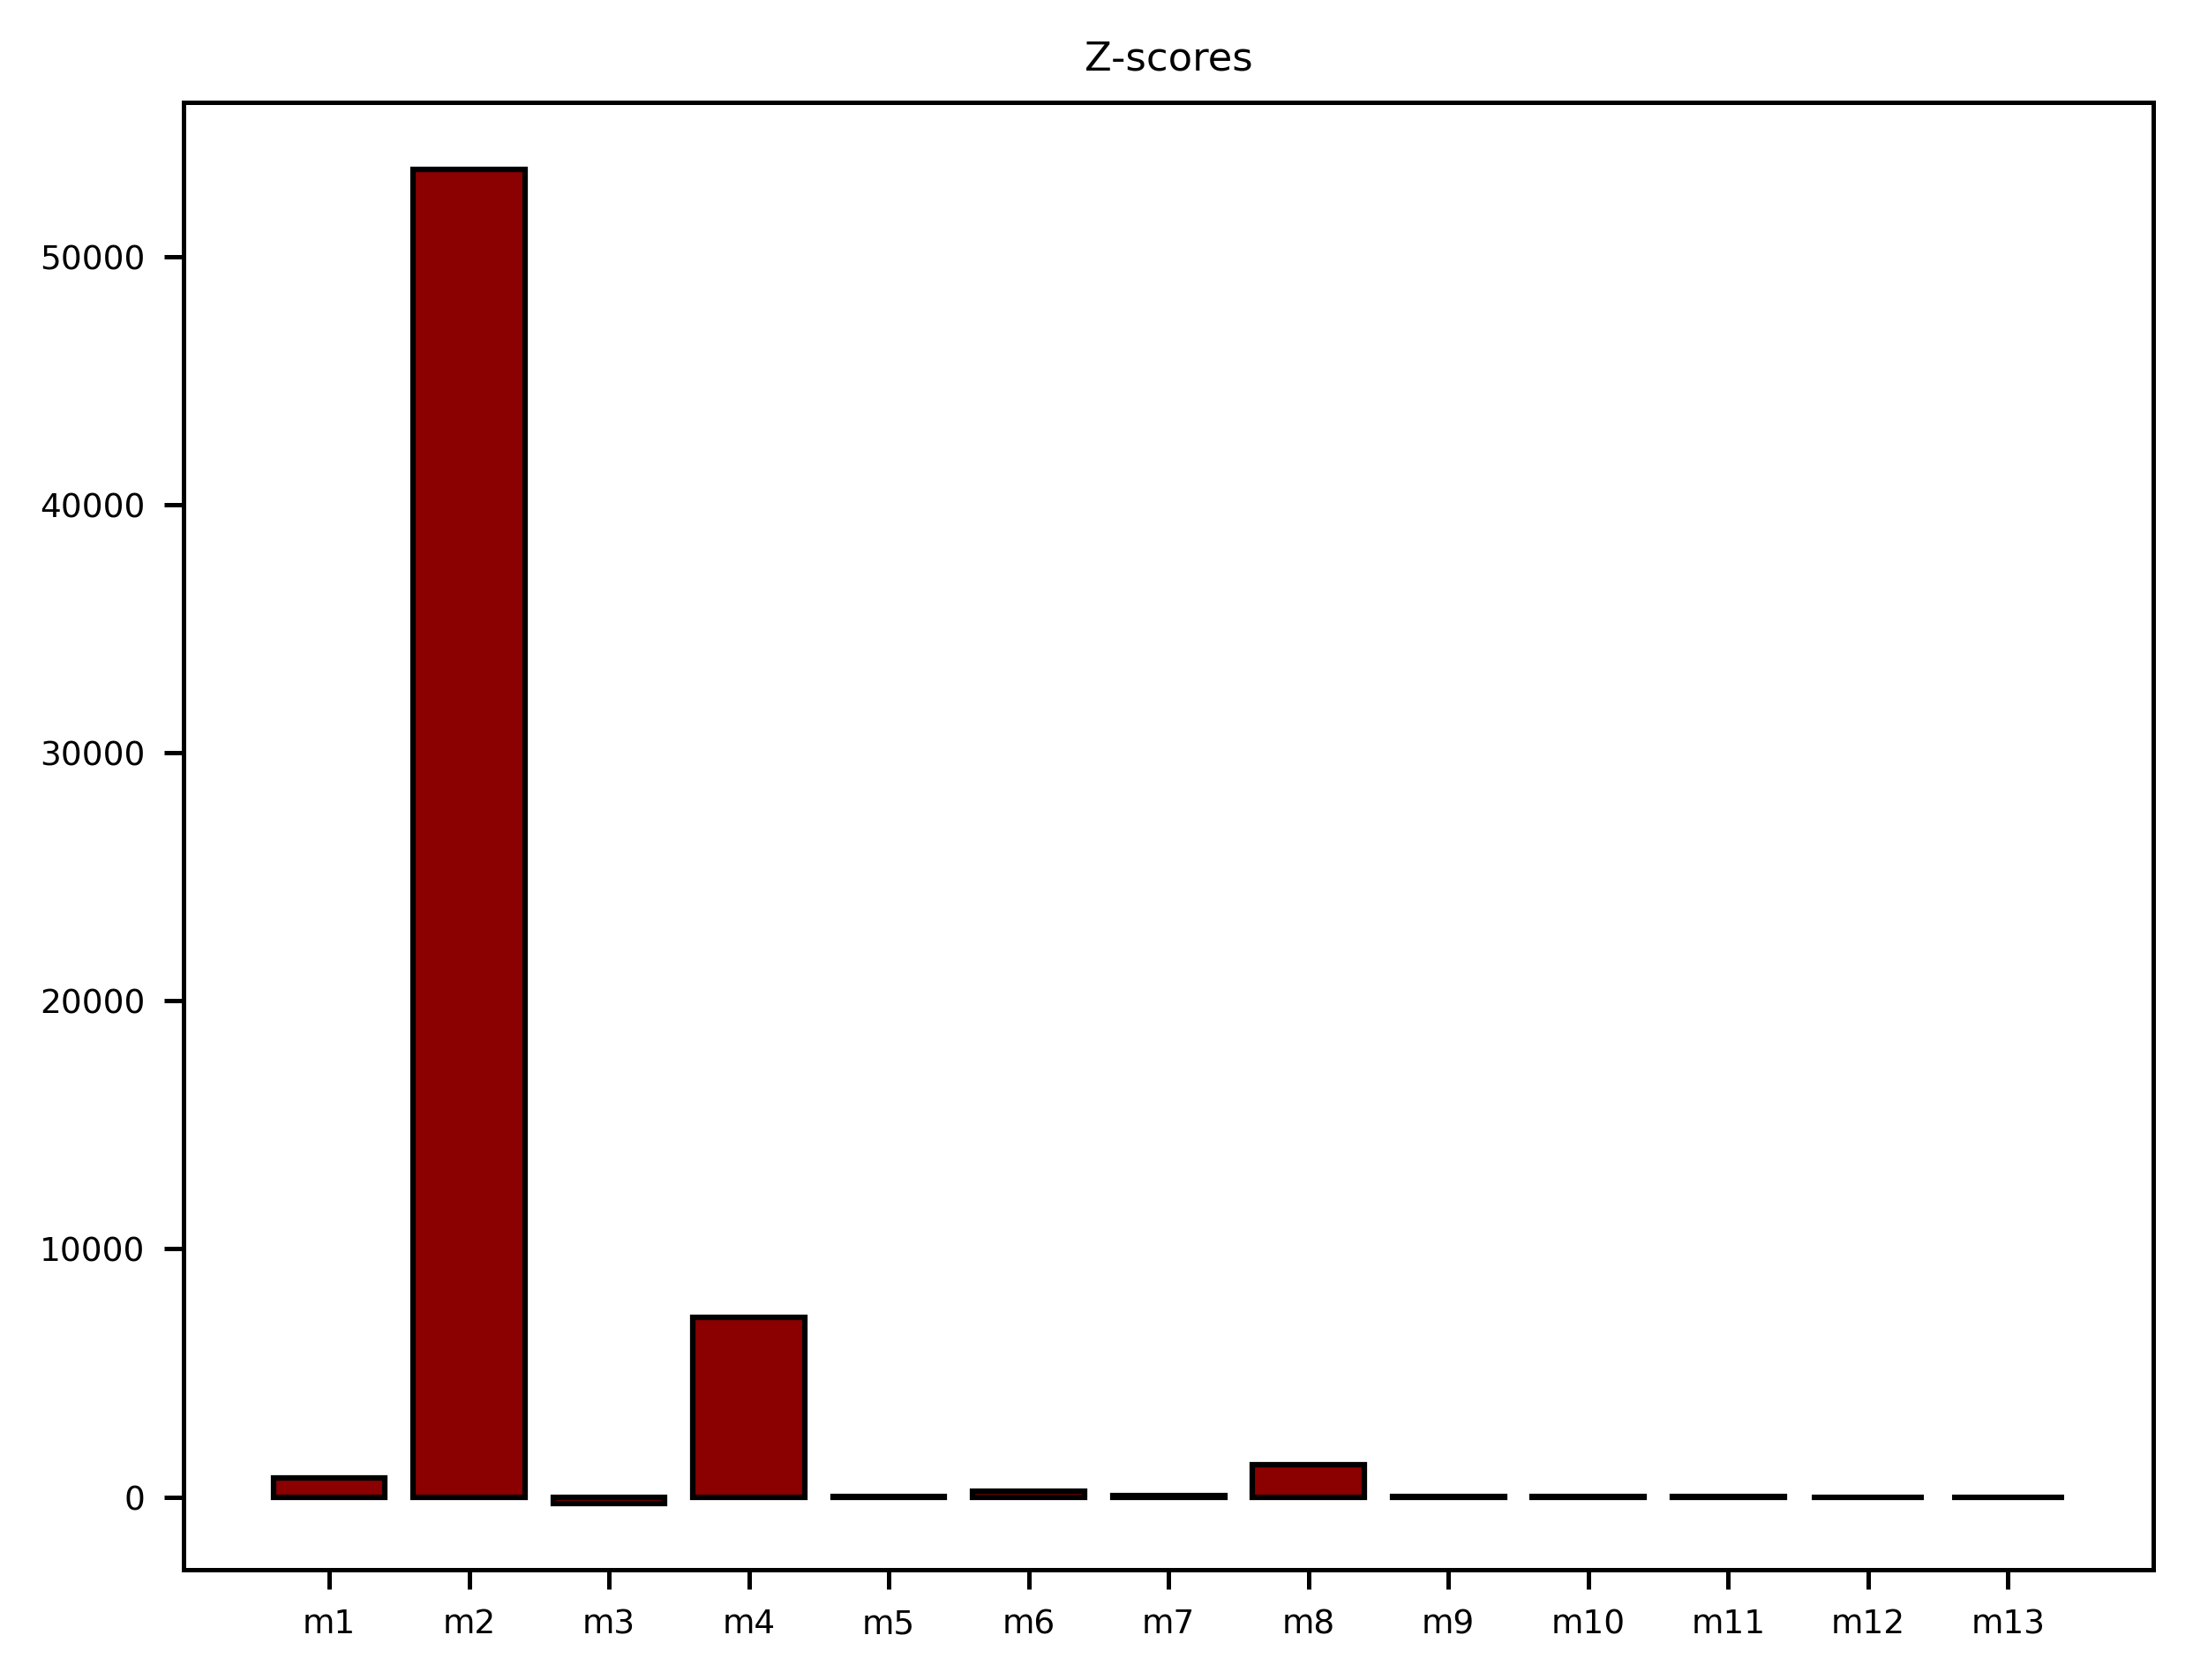

In [59]:
n = list()
for i in range(1,n_motifs+2):
    n += [f"m{i}"]
plt.bar(n,sig_list[1],color="darkred",edgecolor="black",linewidth=1)
plt.title("Z-scores")